In [1]:
import audio_pross
import grifflin
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io.wavfile import write


C:\Users\christian.yepez\OneDrive - Escuela Politécnica Nacional\Tesis\Codigo\pross.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, y = wavfile.read(in_file)
No handles with labels found to put in legend.


length = 3.108730158730159s


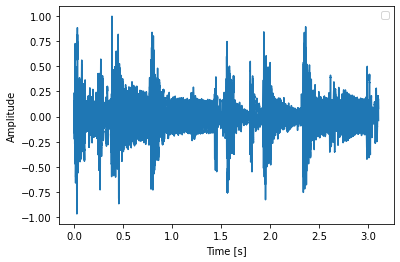

In [2]:
data, samplerate = pross.get_signal('eje.wav')
length = data.shape[0] / samplerate
print(f"length = {length}s")
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

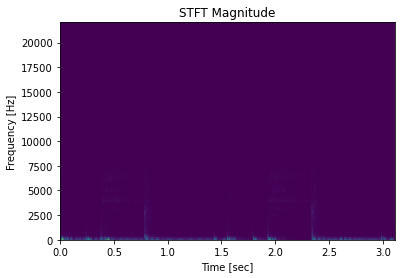

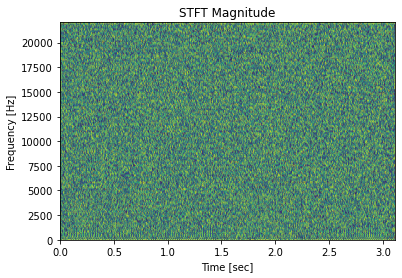

In [3]:
f, t, Zxx = signal.stft(data, fs=samplerate, padded=True)
espectro_magnitud = np.abs(Zxx)
espectro_fase = np.angle(Zxx)
plt.pcolormesh(t, f, espectro_magnitud, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
plt.pcolormesh(t, f, espectro_fase, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


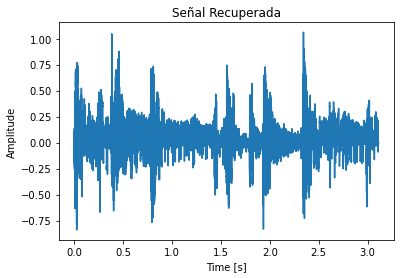

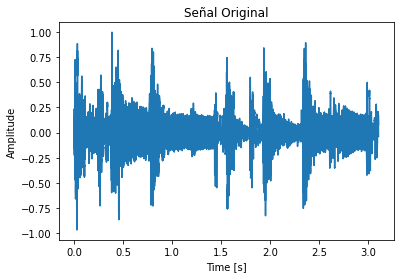

In [4]:
timee, señal_rec=grifflin.reconstruir_señal_generador(espectro_magnitud, 1000, samplerate)
plt.plot(timee,señal_rec)
plt.title("Señal Recuperada")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
plt.plot(time, data)
plt.title("Señal Original")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [5]:
write("example.wav", samplerate, señal_rec.astype(np.float32))
